# Clase 3 y 4: Analísis Exploratorio de Datos

### Requerimientos
Los paquetes a utilizar en esta clase (y curso) son típicos en el análisis estadístico de datos, dentro de ellos podemos encontrar:

* [Seaborn](https://seaborn.pydata.org/index.html) Un paquete que permite la visualización de los datos de forma sencilla y fácil de usar.

* [Matplotlib](https://matplotlib.org/stable/) Matplotlib es un paquete de más bajo nivel que Seaborn, pero es útil cuando los gráficos a realizar requieren de un alto nivel de personalización.


* [Scipy](https://docs.scipy.org/doc/scipy/index.html) Dentro de las multiples funciones de este paquete, se encuentran disponibles diferentes herramientas para el análisis estadístico (entre muchos otros más).

* [Numpy](https://numpy.org/doc/stable/index.html) Numpy esta en el corazón de varios paquetes que pueden encontrar en el ecosistema de Python. Este permite realizar calculos matriciales con facilidad y almacenar datos en forma de matrices y vectores de forma sencilla.

* [Pandas](https://pandas.pydata.org/) Pandas es un paquete que permite trabajar con DataFrames (muy similares a los que ofrece R por defecto). De esta forma, el análisis y almacenamiento de datos se hace mucho más sencillo.

* [Statsmodels](https://www.statsmodels.org/stable/index.html) Este paquete provee de funcionalidades de análisis estadístico que puede que no se encuentren en Scipy.

Para instalarlos dentro de Google Colab, es posible utilizar el comando `!` que permite hacer llamados de `bash` dentro del notebook. En otras palabras, permite utilizar la terminal dentro de Google Colab. De esta manera, podemos utilizar el comando `pip` para instalar paquetes necesarios para el análisis de datos. Estos serán los paquetes base durante el curso, si se utilizan más serán introducidos pertinentemente.

In [1]:
# Requerimientos
!pip install seaborn # Para visualización y datasets
!pip install scipy # Para analísis estadísticos
!pip install numpy # Para cálculos científicos
!pip install pandas # Para almacenamiento y trabajo con datos
!pip install matplotlib # Para visualización
!pip install statsmodels # Para analísis estadísticos

Luego de instalar por paquetes es necesario importarlos de forma de poder trabajar con ellos, para esto se utiliza el comando `import` de `Python`.

In [2]:
# se utilizan apodos por convención entre programadores de Python.
import pandas as pd
import seaborn as sns
import scipy
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

np.random.seed(42) # definimos una semilla para ayudar en la replicación de los datos

## ¿Por qué es importante el análisis exploratorio de datos?

En primera instancia, el análisis exploratorio de datos permite:


*   Entender el comportamiento de los datos a priori ante de nuestros supuestos
*   Identificar errores obvios de experimentación
*   Comprender mejor los patrones y relaciones que contienen nuestros datos
*   Identifcar outliers o eventos anómalos

Un ejemplo claro de esto es el **cuarteto de Ascombe**. El cual puede ser visto a continuación:



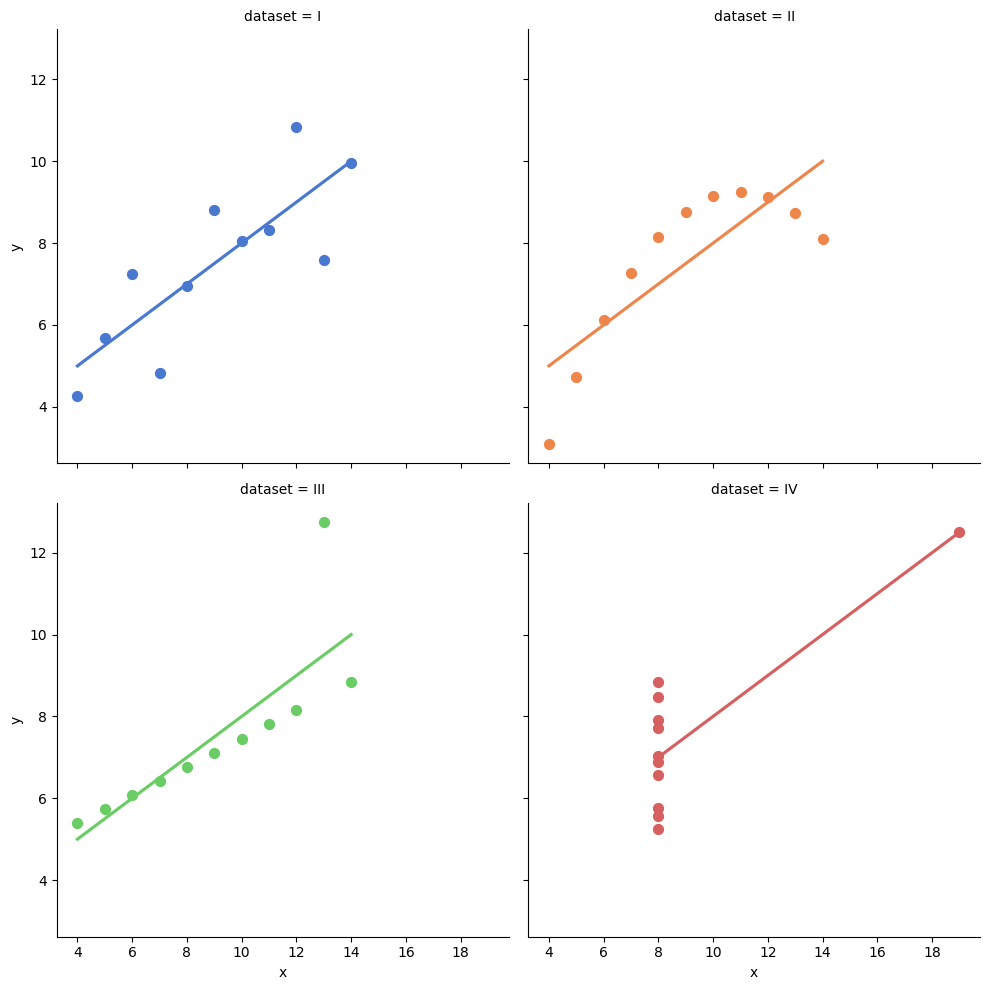

In [3]:
# cargamos el dataset del cuarteto de Ascombe disponible en Seaborn
df = sns.load_dataset("anscombe")
# Show the results of a linear regression within each dataset
sns.lmplot(
    data=df, x="x", y="y", col="dataset", hue="dataset",
    col_wrap=2, palette="muted", ci=None, scatter_kws={"s": 50, "alpha": 1}
)

En este caso, diferentes set de datos generan iguales ajustes lineales. Por lo cual es pertimente realizar un análisis previo y evaluar cual es la mejor forma para analizarlos.

Para mayor información:
- https://seaborn.pydata.org/examples/anscombes_quartet.html
- https://en.wikipedia.org/wiki/Anscombe%27s_quartet

## Visualización de Datos Numéricos

Existen diferentes métodos para visualizar datos. En esta sección se verán los más relevantes.

### Histogramas
Los histogramas son buenos para poder estudiar la distribución o frecuencia de una variable. Son recomendables para bases medianas a grandes (n>20).

Para realizar una visualización de Histogramas es posible utilizar tanto Matplotlib como Seaborn.

(array([  4.,  22.,  96., 228., 272., 226., 104.,  38.,   9.,   1.]),
 array([-1.24126734, -0.53186746,  0.17753243,  0.88693231,  1.59633219,
         2.30573208,  3.01513196,  3.72453184,  4.43393172,  5.14333161,
         5.85273149]),
 <BarContainer object of 10 artists>)

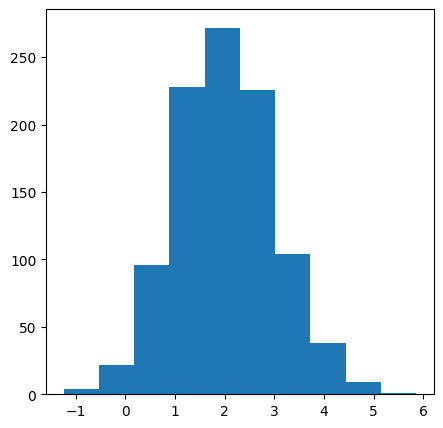

In [4]:
# Generamos un set de datos aleatorio

X = np.random.normal(
    loc = 2, # media
    scale =1, # desviación estandar
    size = 1000 # tamaño
) # generamos
fig, ax = plt.subplots(figsize=(5,5)) # definimos el objeto de la figura y el subplot donde graficar
ax.hist(X) # generamos el histograma


El comando `hist` permite graficar un histograma de forma de entender la distribución de los datos. Para mayor información consultar:
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
- https://matplotlib.org/stable/gallery/statistics/hist.html#sphx-glr-gallery-statistics-hist-py

### Boxplots
Los Boxplots permiten visualizar información estadística relevante de una variable. Este permite visualizar valores atípicos o ourliers.

Se realiza de forma similar a un histograma, utlizando el paquete `Matplotlib`.

{'whiskers': [<matplotlib.lines.Line2D at 0x7bea9bc643d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7bea9bc96750>,
 'boxes': [<matplotlib.lines.Line2D at 0x7bea9c155850>],
 'medians': [<matplotlib.lines.Line2D at 0x7bea9bc97d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7bea9bca48d0>],
 'means': []}

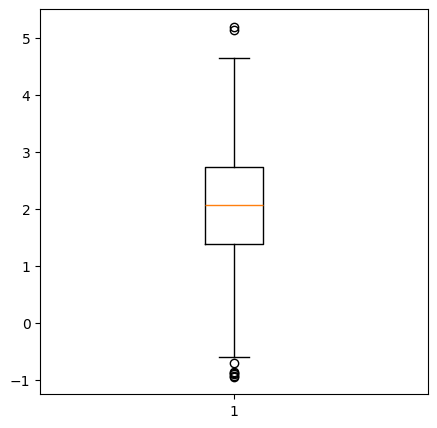

In [5]:
# Generamos un set de datos aleatorio
X = np.random.normal(
    loc = 2, # media
    scale =1, # desviación estandar
    size = 1000 # tamaño
) # generamos
fig, ax = plt.subplots(figsize=(5,5)) # definimos el objeto de la figura y el subplot donde graficar
ax.boxplot(X) # generamos el histograma

El comando `boxplot` permite generar un boxplot de los datos. Para mayor información consultar:
- https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.boxplot.html#matplotlib.axes.Axes.boxplot
- https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html#sphx-glr-gallery-statistics-boxplot-demo-py

### Gráficos de Disperción

Este tipo de gráficos permiten comparar dos variables numéricas e inspeccionar asociaciones y tendencias.
En este caso podemos ver la asociación de dos variables que sigan la ecuación:
$$
y = x^2
$$

Text(0, 0.5, 'y')

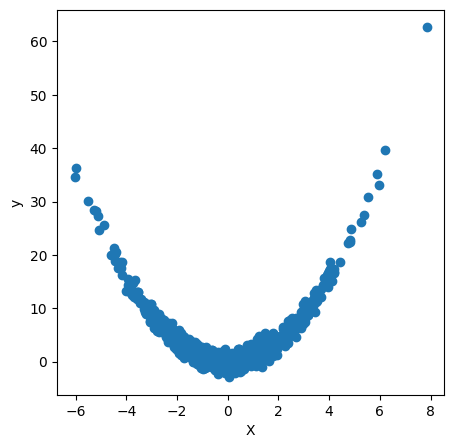

In [6]:
# Generamos datos aleatorios para x

X = np.random.normal(0, 2, size = 1000)
# Generamos los datos y agregamos ruido gaussiano para acercarnos a la realidad
y = X**2 + np.random.normal(0, 1, size = len(X))
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X,y)
ax.set_xlabel('X')
ax.set_ylabel('y')

En este caso, los gráficos de disperción pueden tomar muchas formas, también se puede hacer un gráfico de las distribuciónde de ambas variables.
Por ejemplo a continuación podemos ver las dos distribuciones para X e Y. Este análisis se basa en el siguiente [tutorial](https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_hist.html).

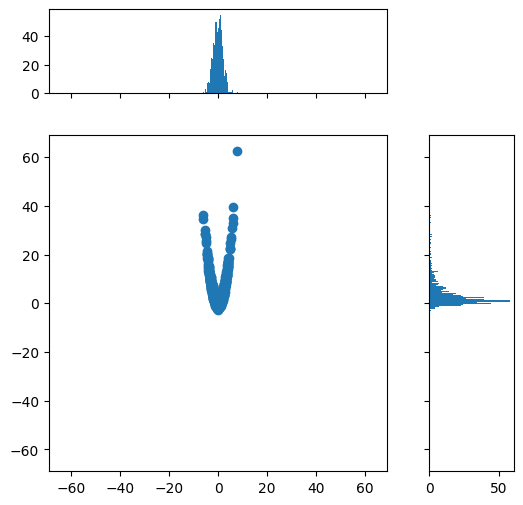

In [7]:
def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')


fig = plt.figure(figsize=(6, 6))

gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4))
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
# Draw the scatter plot and marginals.
scatter_hist(X, y, ax, ax_histx, ax_histy)

Este tipo de gráfico permite identificar la distribución de cada variable, y como se relacionan. Demostrando la funcionalidad y versatilidad de la visualización y analísis exploratorio de datos.

Para mayor información:
- https://en.wikipedia.org/wiki/Scatter_plot
- https://medium.com/analytics-vidhya/scatter-plots-why-how-3de6e1e32645

### QQ-Plots

Los gráficos QQ-plot (Quantile-Quantile Plots) permiten analizar la "normalidad" de los datos*. Para poder realizar este tipo de gráficos, `statsmodels` permite realizar este tipo de gráficos sin la necesidad de realizar el tratamiento de datos y cálculos.

---
*: Se pueden configurar para evaluar si los datos siguen otro tipo de distrbución, pero usualmente es una distribución Normal.

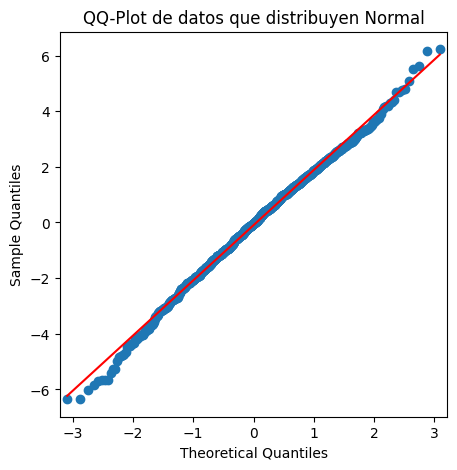

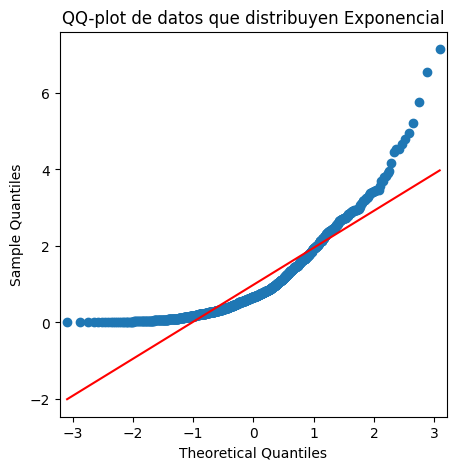

In [8]:
X = np.random.normal(0, 2, size = 1000)
fig, ax = plt.subplots(figsize=(5,5))
sm.qqplot(X, line='s', ax=ax) # esta función permite generar el QQ-plot para los datos X
ax.set_title('QQ-Plot de datos que distribuyen Normal')
plt.show()

# También podemos utilizar otro tipo de distribución para ver la eficacia de este metodo.
W = np.random.exponential(1, size = 1000)
fig, ax = plt.subplots(figsize=(5,5))
sm.qqplot(W, line='s', ax=ax)
ax.set_title('QQ-plot de datos que distribuyen Exponencial')
plt.show()

De esta forma, realizar un gráfico QQ-plot de los datos previo a realizar el análisis de estos permite analizar si es que la distribución de estos es Normal. Si ocurre una desviación de este tipo de distribución, subsiguientes test pueden ser realizados para identificar la distribución que siguen los datos.
Para mayor información consultar:
- https://amitprius.medium.com/fully-understand-q-q-plot-for-probability-distribution-in-machine-learning-7ba16166cae6
- https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.ProbPlot.qqplot.html#statsmodels.graphics.gofplots.ProbPlot.qqplot
- https://www.statsmodels.org/stable/examples/notebooks/generated/discrete_choice_example.html#QQ-plot-of-deviance-residuals

### Análisis de la Mediana y el Promedio

Para una distribución simétrica el promedio y mediana son muy similares, pero esto varía cuando encontramos asímetrias positivas o negativas. Para poder esto, es necesario calcular estas métricas, para esto se puede usar las funciones `np.mean` y `np.median`, las cuales permiten calcular el promedio y mediana de un vector de datos.

Promedio: 0.8274051780655771
Mediana: 0.7082039471973856
Promedio: -0.8157886706359158
Mediana: -0.6958444217361065


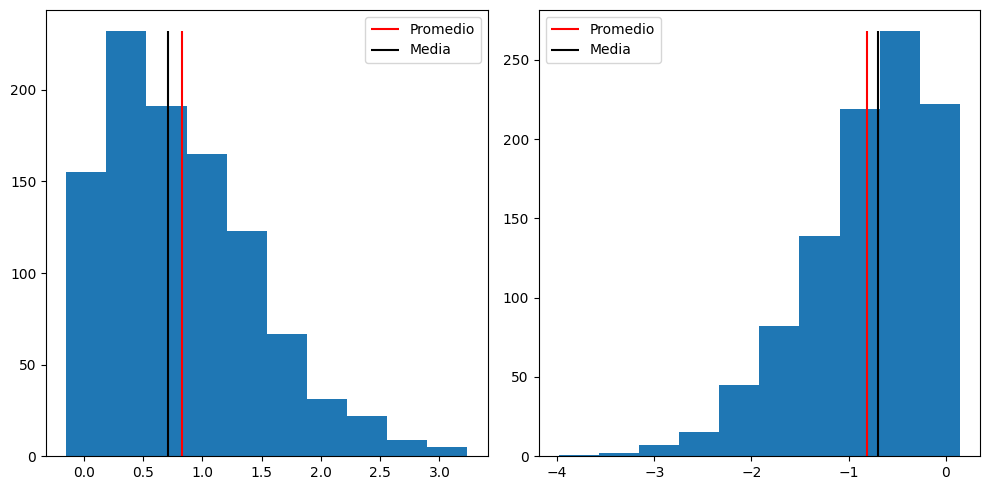

In [9]:
# Generamos datos con asimetrías positivas
rv = scipy.stats.skewnorm(10)
X = rv.rvs(size=1000)
print(f'Promedio: {np.mean(X)}')
print(f'Mediana: {np.median(X)}')
fig, ax = plt.subplots(1,2, figsize=(10,5))
n, bins, patches = ax[0].hist(X)
lower_limit = bins[0]
upper_limit = bins[-1]
ax[0].vlines(np.mean(X), ymin = 0, ymax = np.max(n), color = 'red', label = 'Promedio')
ax[0].vlines(np.median(X), ymin = 0, ymax = np.max(n), color = 'black', label = 'Media')
ax[0].legend()


# Generamos datos con asimetrías negativas
rv = scipy.stats.skewnorm(-10)
X = rv.rvs(size=1000)
print(f'Promedio: {np.mean(X)}')
print(f'Mediana: {np.median(X)}')

n, bins, patches = ax[1].hist(X)
lower_limit = bins[0]
upper_limit = bins[-1]
ax[1].vlines(np.mean(X), ymin = 0, ymax = np.max(n), color = 'red', label = 'Promedio')
ax[1].vlines(np.median(X), ymin = 0, ymax = np.max(n), color = 'black', label = 'Media')
ax[1].legend()
fig.tight_layout()
plt.show()


En este caso, lo relevante de esta visualización es poder calcular estadísticos relevantes de los set de datos, como es la media y el promedio.
Y es posible visualizarlos, como se vio en el gráfico de arriba.

# Mejorando gráficos

Es importante como se presentan los datos a la hora de comunicar un mensaje. En esta instancia, mostraremos diferentes opciones en Matplotlib para mejorar la figura generada.

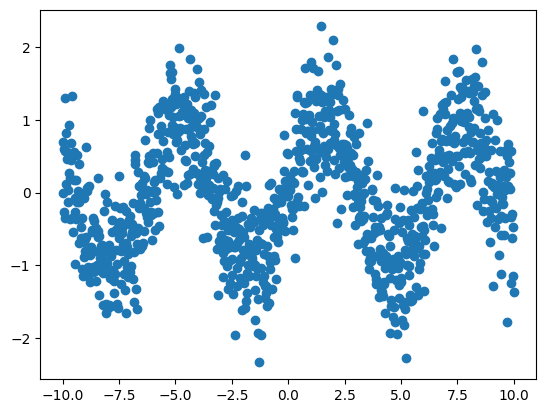

In [10]:
# Generamos datos
X = np.linspace(-10,10, 1000)

y = np.sin(X) + np.random.normal(0,0.5, size = len(X))
fig, ax = plt.subplots()
ax.scatter(X,y)

En este caso, se puede mejorar el gráfico mediante:
- Agregar las etiquetas a los ejes.
- Cambiar el tamaño de la figura para ver mejor el patrón.
- Aumentar la calidad de la visualización (dpi).
- Si se quiere, cambiar el color de los puntos.

Text(0.5, 1.0, 'Gráfico de dispersión de datos')

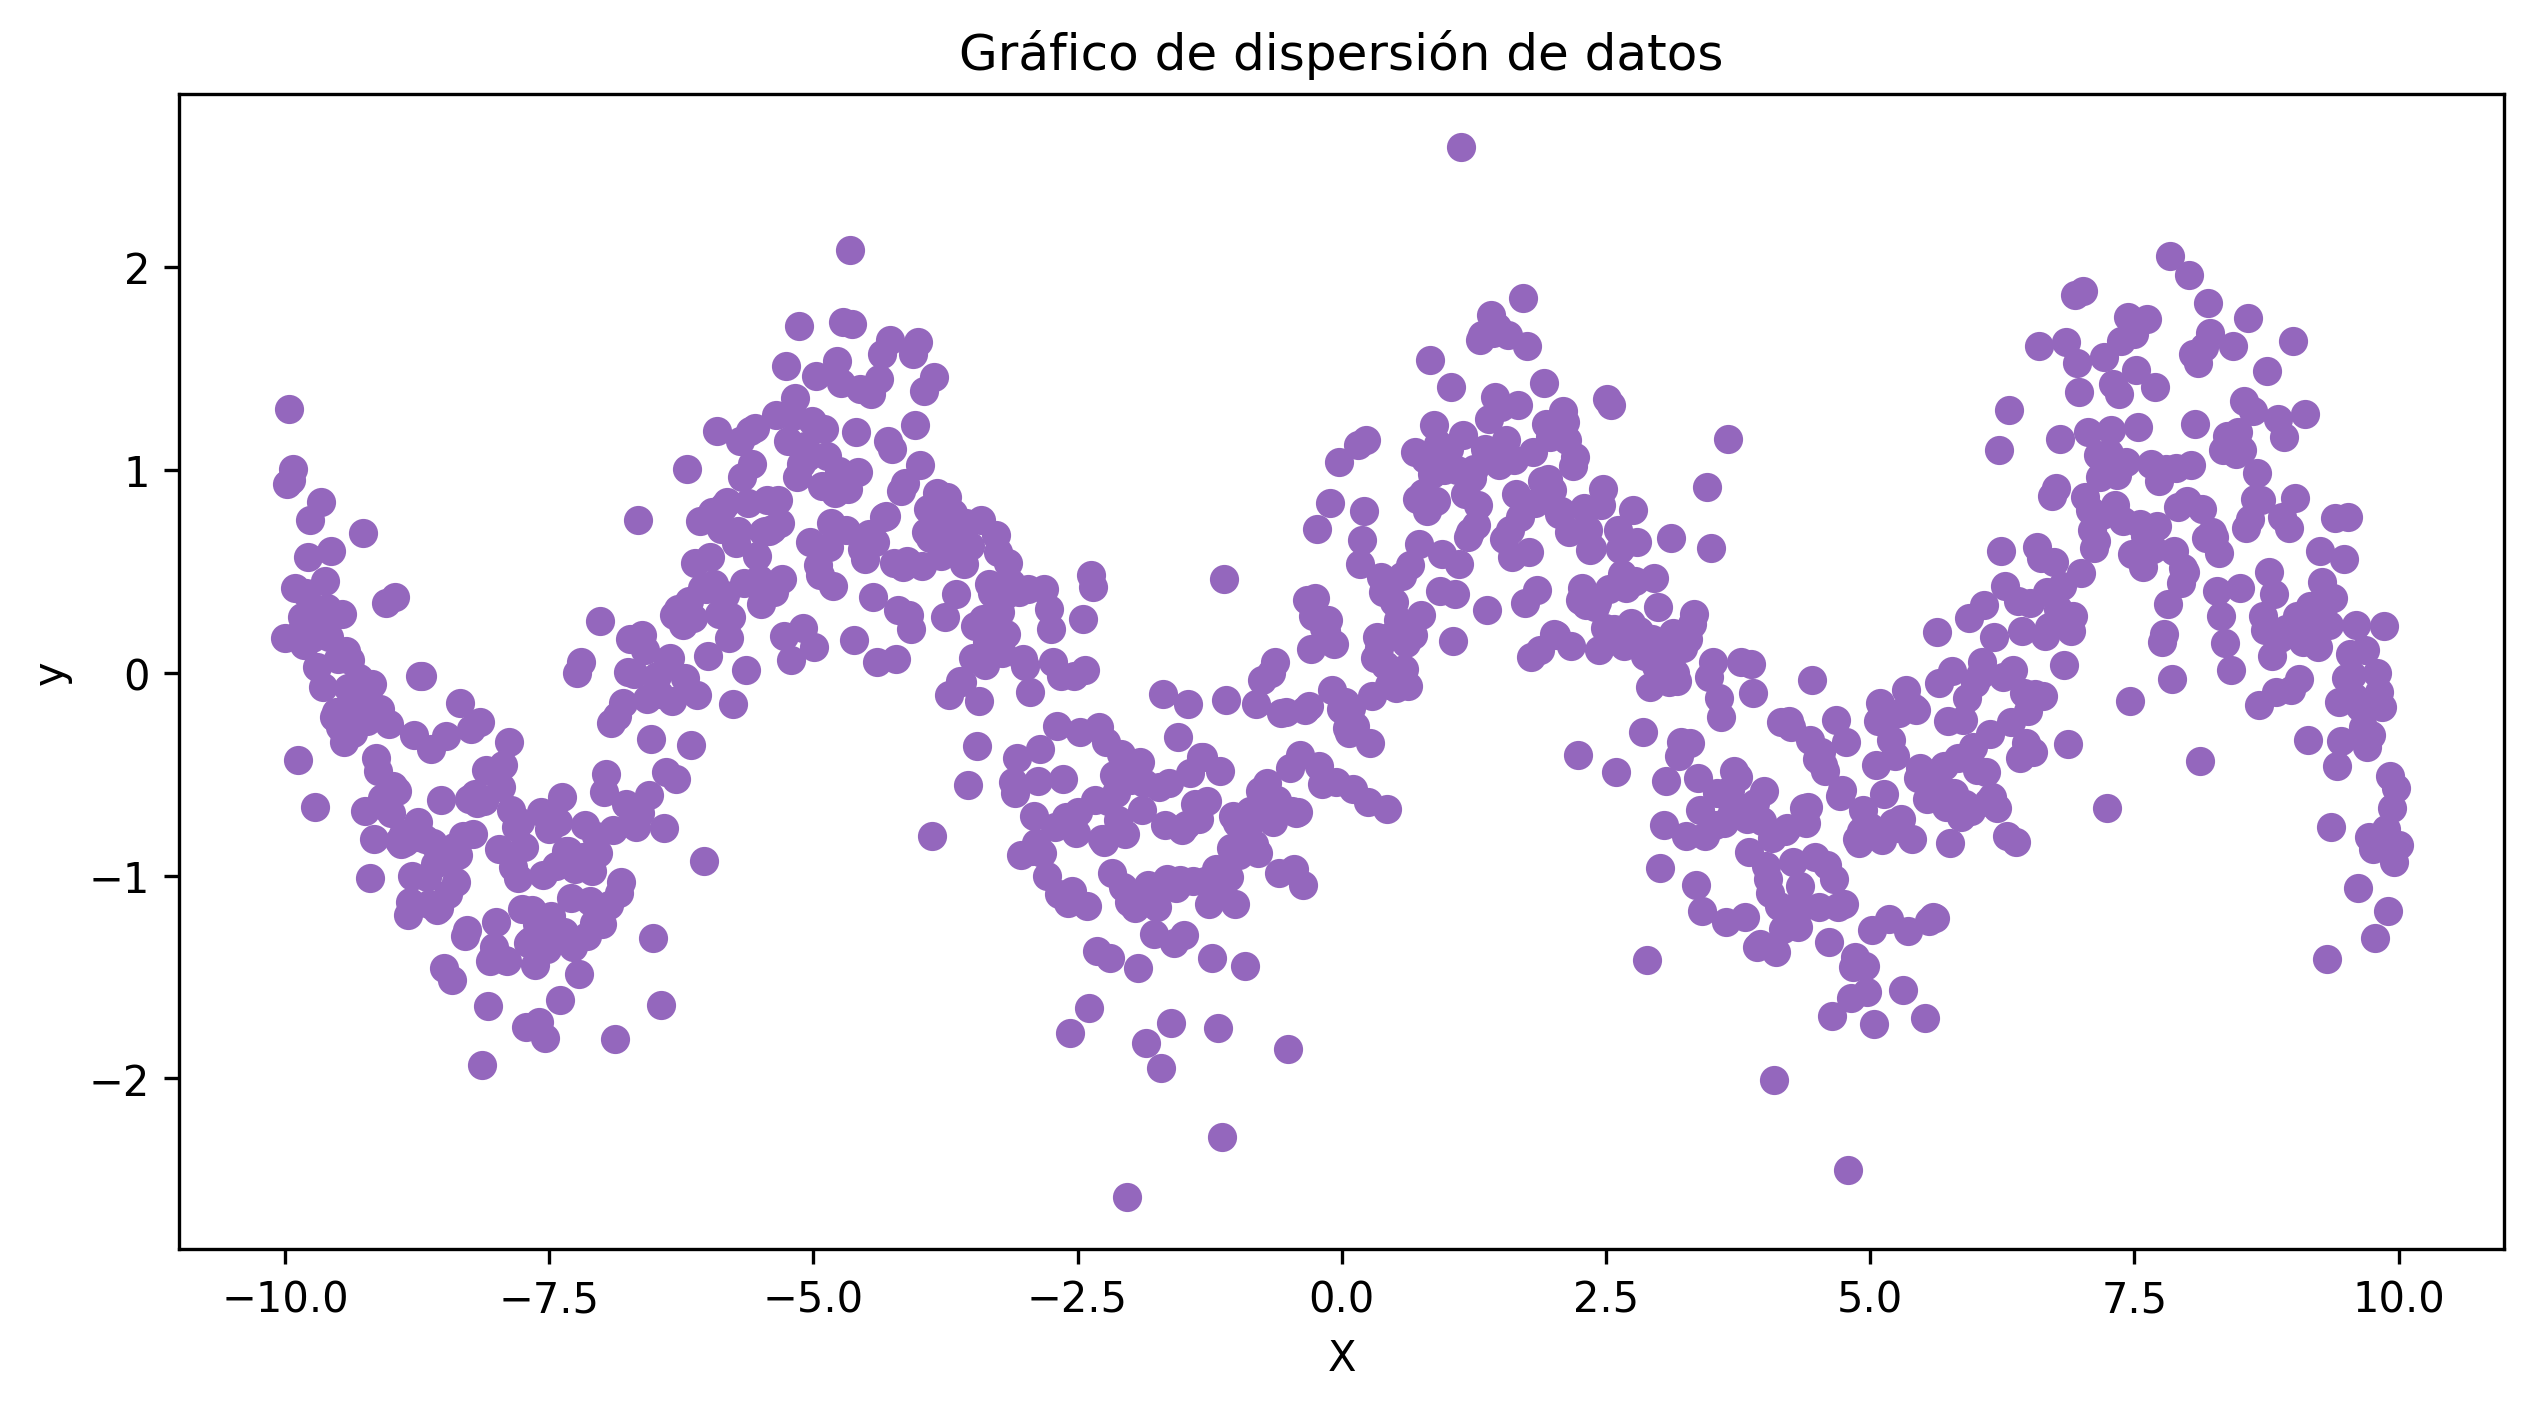

In [11]:
# Generamos datos
X = np.linspace(-10,10, 1000)

y = np.sin(X) + np.random.normal(0,0.5, size = len(X))
fig, ax = plt.subplots(
    figsize = (10,5), # tamaño de la figura
    dpi = 300 # calidad de la figura
)
ax.scatter(X,y, c = 'tab:purple')
ax.set_xlabel('X') # Agregar la etiqueta de los datos en el eje X
ax.set_ylabel('y') # Agregar la etiqueta de los datos en el eje y
ax.set_title('Gráfico de dispersión de datos') # agregamos título


Tambien es posible cambiar la tipografía de la figura de forma de facilitar la visualización los lectores.

<ipython-input-12-edf9769ea39a>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels = ax.get_xticks(),
<ipython-input-12-edf9769ea39a>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels = ax.get_yticks(),


Text(0.5, 1.0, 'Gráfico de dispersión de datos')

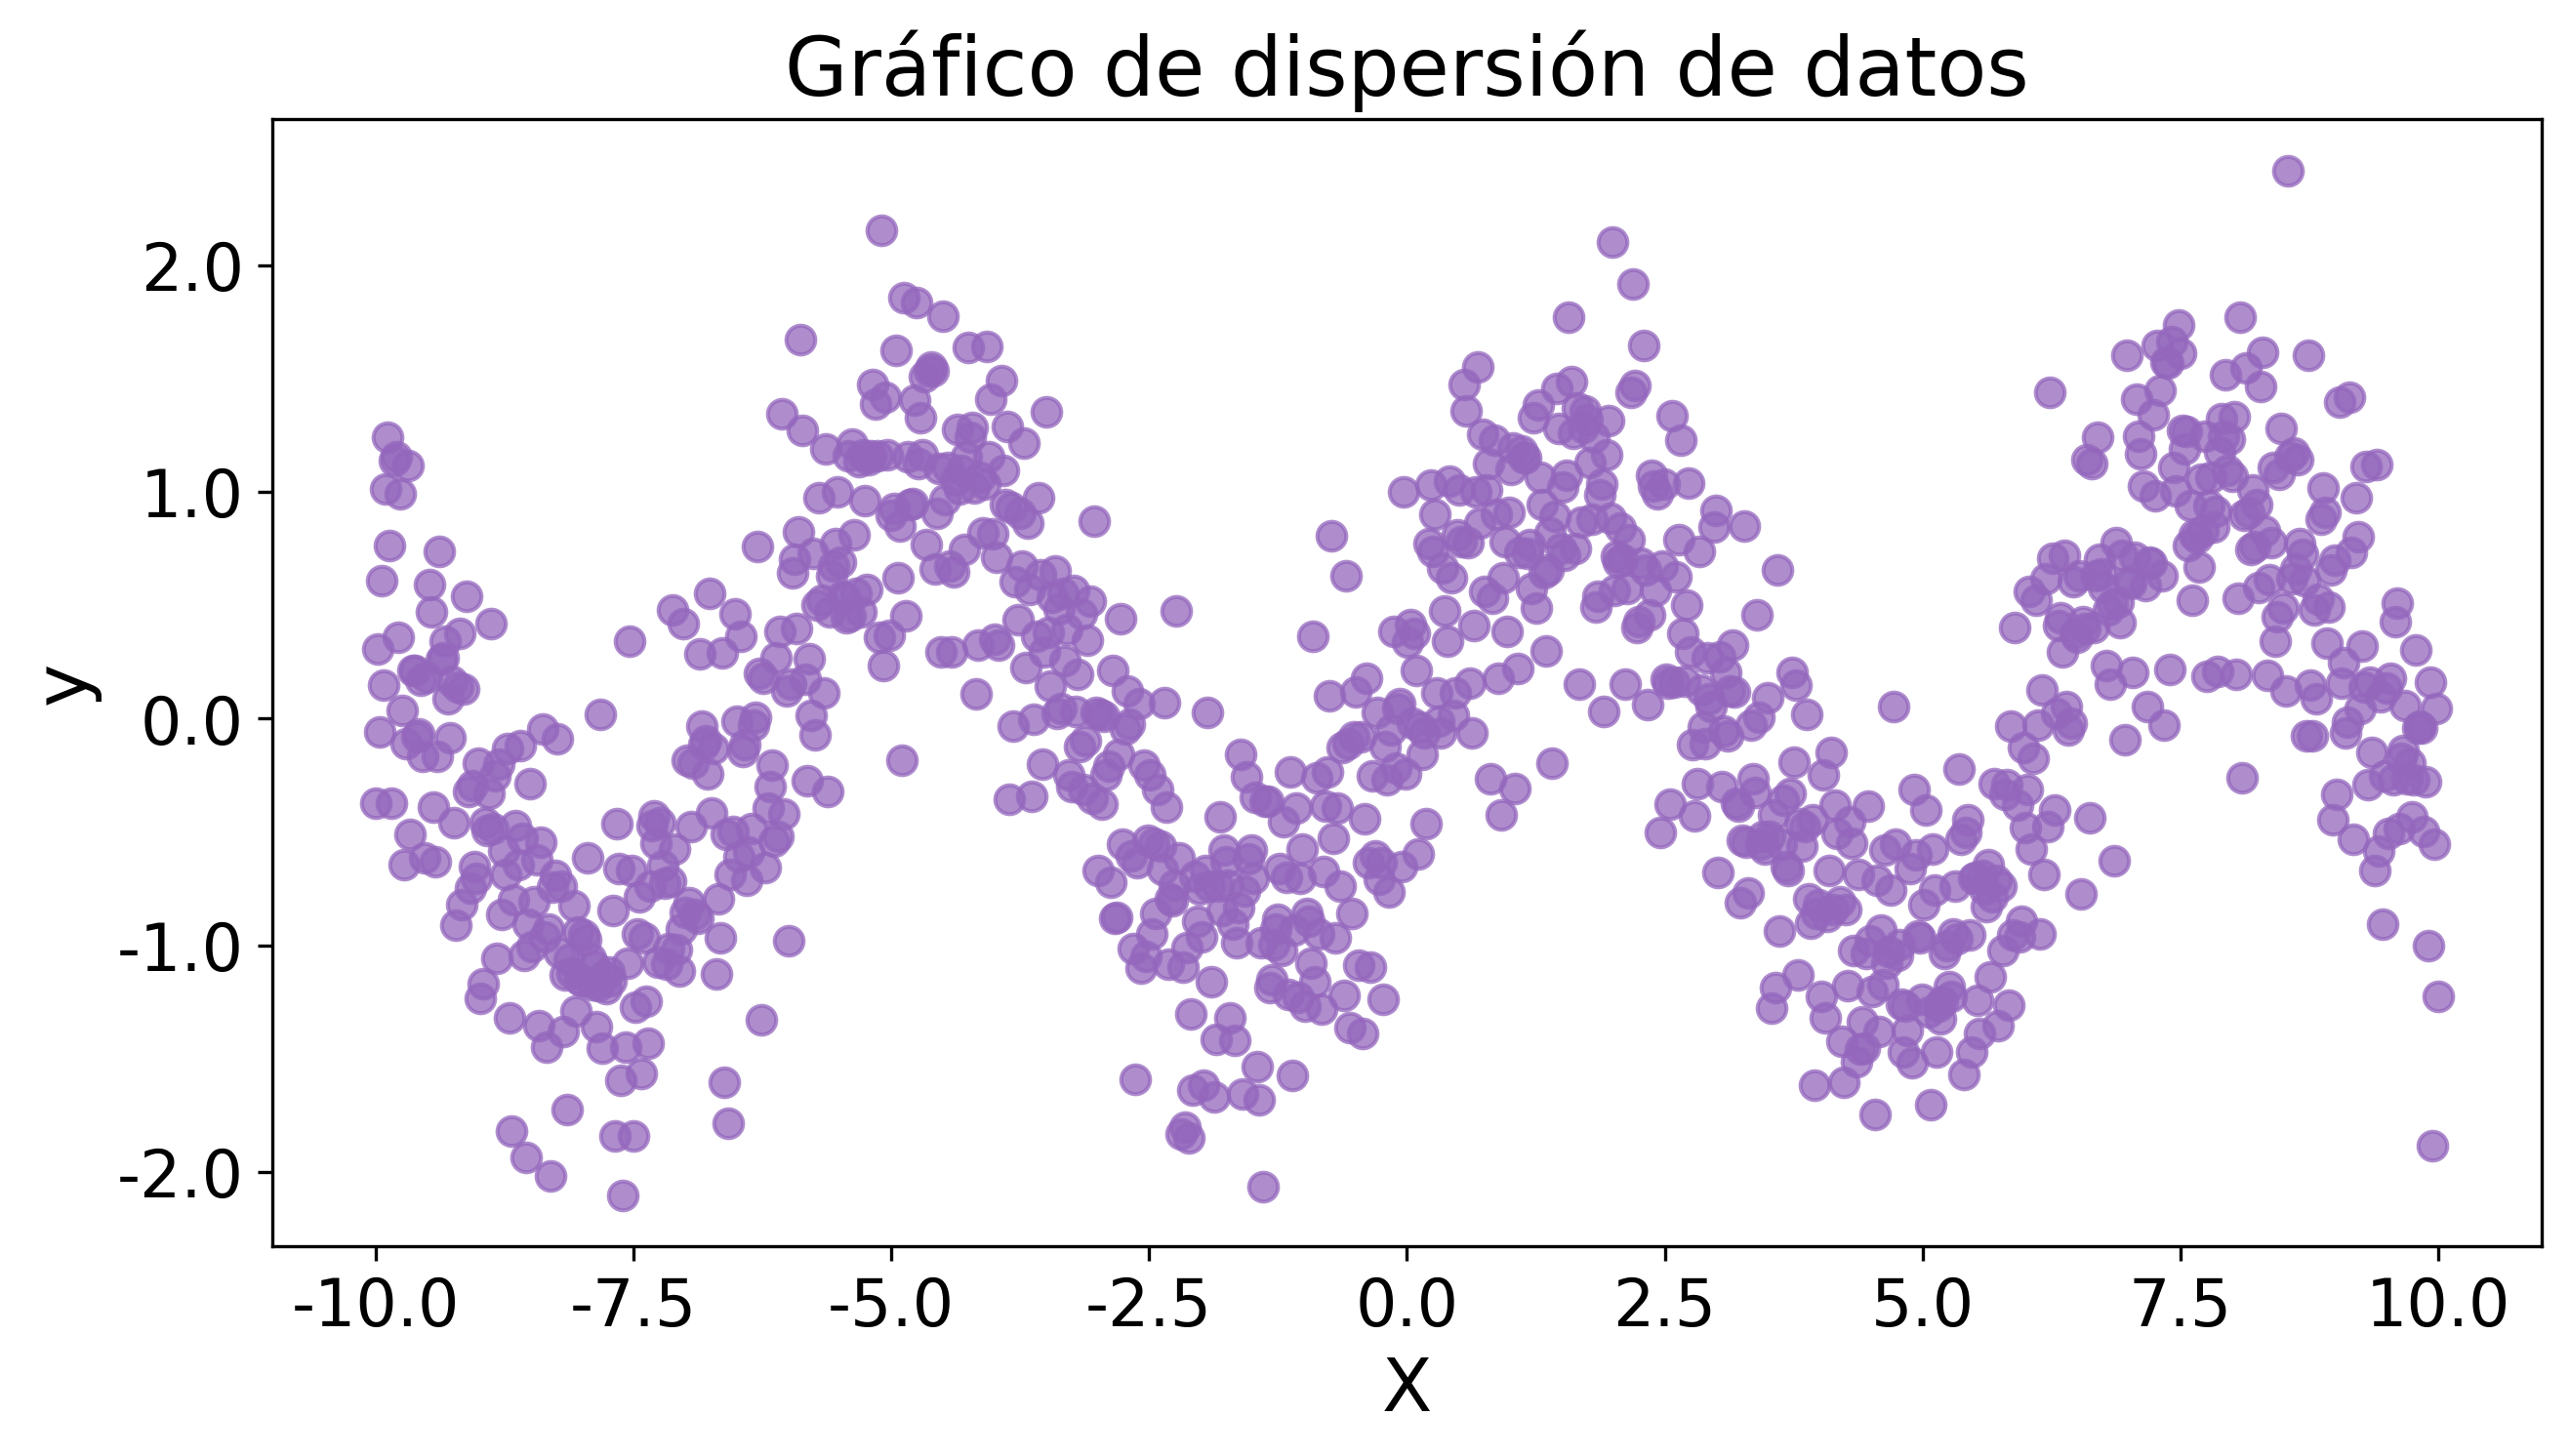

In [12]:
# Generamos datos
X = np.linspace(-10,10, 1000)

y = np.sin(X) + np.random.normal(0,0.5, size = len(X))
fig, ax = plt.subplots(
    figsize = (10,5), # tamaño de la figura
    dpi = 300 # calidad de la figura
)
ax.scatter(X,y, c = 'tab:purple', s = 50, alpha = 0.75)
ax.set_xlabel('X',fontsize = 18) # Agregar la etiqueta de los datos en el eje X
ax.set_xticklabels(labels = ax.get_xticks(),
    fontdict = {
        'weight': 'normal',
        'size': 16,
    }
) # Agregar la etiqueta de los datos en el eje X
ax.set_ylabel('y', fontsize = 18) # Agregar la etiqueta de los datos en el eje y
ax.set_yticklabels(labels = ax.get_yticks(),
    fontdict = {
        'weight': 'normal',
        'size': 16,
    }
) # Agregar la etiqueta de los datos en el eje y
ax.set_title('Gráfico de dispersión de datos', fontsize = 20) # agregamos título